In [4]:
from bs4 import BeautifulSoup
import requests

In [154]:
url = "https://www.imdb.com/search/title/?title_type=tv_series&release_date=2000-01-01,2020-12-31&count=100"
response = requests.get(url) 

In [155]:
soup = BeautifulSoup(response.text, "html.parser") 

In [156]:
soup #parsing get request using BeautifulSoup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>TV Series,
Released between 2000-01-01 and 2020-12-31
(Sorted by Popularity Ascending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {

In [157]:
tv_containers = soup.find_all('div', class_ = 'lister-item mode-advanced') #using the find_all method for this particular class within the html structure
print(type(tv_containers))
print(len(tv_containers))

<class 'bs4.element.ResultSet'>
100


In [23]:
list(tv_containers) #changing the BeautifulSoup object into a list

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt6468322"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt6468322/"> <img alt="La Casa de Papel" class="loadlate" data-tconst="tt6468322" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDcxOGI0MDYtNTc5NS00NDUzLWFkOTItNDIxZjI0OTllNTljXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt6468322/">La Casa de Papel</a>
 <span class="lister-item-year text-muted unbold">(2017– )</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">TV-MA</span>
 <span class="ghost">|</span>
 <span class="runtime">70 min</span>
 <span cl

In [158]:
first_tv = tv_containers[0] #accessing the first element of the list we just created
first_tv

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt6468322"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt6468322/"> <img alt="La Casa de Papel" class="loadlate" data-tconst="tt6468322" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDcxOGI0MDYtNTc5NS00NDUzLWFkOTItNDIxZjI0OTllNTljXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt6468322/">La Casa de Papel</a>
<span class="lister-item-year text-muted unbold">(2017– )</span>
</h3>
<p class="text-muted">
<span class="certificate">TV-MA</span>
<span class="ghost">|</span>
<span class="runtime">70 min</span>
<span class="ghost">|</spa

In [29]:
first_tv.h3.a #checked to see the structure of the desired tags needed from our website

<a href="/title/tt6468322/">La Casa de Papel</a>

In [30]:
first_name = first_tv.h3.a.text #parsing down to the text needed from the specific tag
first_name 

'La Casa de Papel'

In [105]:
final = first_genre.lstrip("\na") #wanted to filter out unecessary parts of needed tags
final

'Action, Crime, Mystery            '

In [107]:
final.split() #seperated the single string into 3 seperate elements within a list

['Action,', 'Crime,', 'Mystery']

In [159]:
all_shows=[]                #empty list to add every tag of the html structure within the first page of our website
for tv in tv_containers:    #iterating over every needed tag within the first page
#     print(tv.h3.a.text)   #used print method line by line to make sure loop ran successfully
    show = {}               #created an empty dictionary so we could organize our data by show
    if tv.find("span", class_ = "runtime") is not None:   
        show["run_time"]= int(tv.find("span", class_ = "runtime").text.split(" ")[0])
        show["name"] = tv.h3.a.text
        show["imdb"] = float(tv.strong.text)
        show["vote"] = int(tv.find("span", attrs = {"name": "nv"})["data-value"])
        show["year"] = tv.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
        show["genre"] = tv.find("span", class_ = "genre").text.lstrip("\na").strip(' ').split(', ')
    all_shows.append(show)      #adding every looped tag in our list above

In [160]:
test_df = pd.DataFrame(all_shows)  #converts all scraped pages into a Pandas Data Frame
print(test_df.info)  #wanted to see the concise summary of the Data Frame
test_df

<bound method DataFrame.info of     run_time                       name  imdb      vote         year  \
0       70.0           La Casa de Papel   8.5  216451.0     (2017– )   
1       60.0                      Ozark   8.4  137421.0     (2017– )   
2       62.0                  Westworld   8.7  388614.0     (2016– )   
3       44.0           The Walking Dead   8.2  822003.0     (2010– )   
4       22.0                  Community   8.5  185353.0  (2009–2015)   
..       ...                        ...   ...       ...          ...   
95      60.0           The Last Kingdom   8.3   61769.0     (2015– )   
96      57.0              World on Fire   7.1    2499.0     (2019– )   
97       NaN                        NaN   NaN       NaN          NaN   
98      57.0  The Marvelous Mrs. Maisel   8.7   65834.0     (2017– )   
99       NaN                        NaN   NaN       NaN          NaN   

                        genre  
0    [Action, Crime, Mystery]  
1    [Crime, Drama, Thriller]  
2    [D

,run_time,name,imdb,vote,year,genre
0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"[Action, Crime, Mystery]"
1,60.0,Ozark,8.4,137421.0,(2017– ),"[Crime, Drama, Thriller]"
2,62.0,Westworld,8.7,388614.0,(2016– ),"[Drama, Mystery, Sci-Fi]"
3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"[Drama, Horror, Thriller]"
4,22.0,Community,8.5,185353.0,(2009–2015),[Comedy]
...,...,...,...,...,...,...
95,60.0,The Last Kingdom,8.3,61769.0,(2015– ),"[Action, Drama, History]"
96,57.0,World on Fire,7.1,2499.0,(2019– ),"[Drama, War]"
97,NaN,NaN,NaN,NaN,NaN,NaN
98,57.0,The Marvelous Mrs. Maisel,8.7,65834.0,(2017– ),"[Comedy, Drama]"


In [187]:
pages = [str(i) for i in range(101,5002,100)]
# years_url = [str(i) for i in range(2000,2018)]

In [190]:
len(pages)

50

In [180]:
import pandas as pd
from time import sleep    
from random import randint
from tqdm import tqdm

In [193]:
all_shows = []     #same exact loop as above except now we are scraping multiple pages which will lead into our Pandas Data Frame
for page in tqdm(pages):
    response2 = requests.get("https://www.imdb.com/search/title/?title_type=tv_series&release_date=2000-01-01,2019-12-31&count=100&start=" + page + "&ref_=adv_nxt")  #alters url to grab consecutive pages to scrape
    sleep(randint(2,4))     #randomizes the number of get requests per 2-3 seconds
    page_html = BeautifulSoup(response2.text, 'html.parser')
    tv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
    for tv in tv_containers:
#     print(tv.h3.a.text)
        show = {}
        if tv.find("span", class_ = "runtime") is not None:    #created a condition to not loop over non existent values for run-time
            if tv.strong is not None:
                show["run_time"]= int(tv.find("span", class_ = "runtime").text.split(" ")[0])
                show["name"] = tv.h3.a.text
                show["imdb"] = float(tv.strong.text)
                show["vote"] = int(tv.find("span", attrs = {"name": "nv"})["data-value"])
                show["year"] = tv.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
                show["genre"] = tv.find("span", class_ = "genre").text.lstrip("\na").strip(' ').split(', ')
            all_shows.append(show)



  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:05<04:07,  5.06s/it]

  4%|▍         | 2/50 [00:09<03:50,  4.80s/it]

  6%|▌         | 3/50 [00:14<03:55,  5.00s/it]

  8%|▊         | 4/50 [00:20<03:55,  5.12s/it]

 10%|█         | 5/50 [00:23<03:24,  4.53s/it]

 12%|█▏        | 6/50 [00:26<03:00,  4.09s/it]

 14%|█▍        | 7/50 [00:30<03:00,  4.21s/it]

 16%|█▌        | 8/50 [00:34<02:47,  3.98s/it]

 18%|█▊        | 9/50 [00:37<02:34,  3.78s/it]

 20%|██        | 10/50 [00:42<02:48,  4.22s/it]

 22%|██▏       | 11/50 [00:48<03:02,  4.69s/it]

 24%|██▍       | 12/50 [00:53<02:57,  4.67s/it]

 26%|██▌       | 13/50 [00:58<03:01,  4.89s/it]

 28%|██▊       | 14/50 [01:04<03:01,  5.05s/it]

 30%|███       | 15/50 [01:09<03:01,  5.18s/it]

 32%|███▏      | 16/50 [01:15<03:02,  5.38s/it]

 34%|███▍      | 17/50 [01:20<02:59,  5.44s/it]

 36%|███▌      | 18/50 [01:26<02:55,  5.50s/it]

 38%|███▊      | 19/50 [01:30<02:31,  4.88s/it]

 40%|████      | 20/50 [01:34<02:24,

In [195]:
len(all_shows) #checked to see if scraping of all pages was succesful by checking number of returned TV shows

4250

In [199]:
df = pd.DataFrame(all_shows) #displayed Data Frame from scraped TV shows
df

,run_time,name,imdb,vote,year,genre
0,40.0,Bones,7.8,133688.0,(2005–2017),"[Comedy, Crime, Drama]"
1,58.0,Downton Abbey,8.7,152777.0,(2010–2015),"[Drama, Romance]"
2,43.0,Blue Bloods,7.5,30599.0,(2010– ),"[Crime, Drama, Mystery]"
3,22.0,The Good Place,8.2,92511.0,(2016–2020),"[Comedy, Drama, Fantasy]"
4,44.0,Gilmore Girls,8.1,91945.0,(2000–2007),"[Comedy, Drama]"
...,...,...,...,...,...,...
4245,60.0,Game of Silence,7.0,2400.0,(2016),[Drama]
4246,23.0,The Land Before Time,6.4,594.0,(2007– ),"[Animation, Short, Adventure]"
4247,42.0,My Big Fat Fabulous Life,3.7,730.0,(2015– ),[Reality-TV]
4248,50.0,Celebrity Gogglebox,7.0,53.0,(2019– ),[Reality-TV]


In [204]:
f_df = pd.concat([test_df, df])  #had to merge the first page of scraped results to the remainder 49
f_df.head(20)

,run_time,name,imdb,vote,year,genre
0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"[Action, Crime, Mystery]"
1,60.0,Ozark,8.4,137421.0,(2017– ),"[Crime, Drama, Thriller]"
2,62.0,Westworld,8.7,388614.0,(2016– ),"[Drama, Mystery, Sci-Fi]"
3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"[Drama, Horror, Thriller]"
4,22.0,Community,8.5,185353.0,(2009–2015),[Comedy]
5,46.0,Better Call Saul,8.7,281241.0,(2015– ),"[Crime, Drama]"
6,57.0,Game of Thrones,9.3,1659569.0,(2011–2019),"[Action, Adventure, Drama]"
7,NaN,NaN,NaN,NaN,NaN,NaN
8,49.0,Breaking Bad,9.5,1333210.0,(2008–2013),"[Crime, Drama, Thriller]"
9,41.0,Grey's Anatomy,7.6,231264.0,(2005– ),"[Drama, Romance]"


In [208]:
f_df = f_df.dropna(axis = 0) #dropped all na values in our Data Frame
f_df.head(20)

,run_time,name,imdb,vote,year,genre
0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"[Action, Crime, Mystery]"
1,60.0,Ozark,8.4,137421.0,(2017– ),"[Crime, Drama, Thriller]"
2,62.0,Westworld,8.7,388614.0,(2016– ),"[Drama, Mystery, Sci-Fi]"
3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"[Drama, Horror, Thriller]"
4,22.0,Community,8.5,185353.0,(2009–2015),[Comedy]
5,46.0,Better Call Saul,8.7,281241.0,(2015– ),"[Crime, Drama]"
6,57.0,Game of Thrones,9.3,1659569.0,(2011–2019),"[Action, Adventure, Drama]"
8,49.0,Breaking Bad,9.5,1333210.0,(2008–2013),"[Crime, Drama, Thriller]"
9,41.0,Grey's Anatomy,7.6,231264.0,(2005– ),"[Drama, Romance]"
10,55.0,Homeland,8.3,293969.0,(2011–2020),"[Crime, Drama, Mystery]"


In [209]:
f_df = f_df.reset_index(drop = True) #reset the index after concatonating the two merged DF's & from the deletion of the rows
f_df.head(20)

,run_time,name,imdb,vote,year,genre
0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"[Action, Crime, Mystery]"
1,60.0,Ozark,8.4,137421.0,(2017– ),"[Crime, Drama, Thriller]"
2,62.0,Westworld,8.7,388614.0,(2016– ),"[Drama, Mystery, Sci-Fi]"
3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"[Drama, Horror, Thriller]"
4,22.0,Community,8.5,185353.0,(2009–2015),[Comedy]
5,46.0,Better Call Saul,8.7,281241.0,(2015– ),"[Crime, Drama]"
6,57.0,Game of Thrones,9.3,1659569.0,(2011–2019),"[Action, Adventure, Drama]"
7,49.0,Breaking Bad,9.5,1333210.0,(2008–2013),"[Crime, Drama, Thriller]"
8,41.0,Grey's Anatomy,7.6,231264.0,(2005– ),"[Drama, Romance]"
9,55.0,Homeland,8.3,293969.0,(2011–2020),"[Crime, Drama, Mystery]"


In [27]:
import ast          #turned our strings into lists in the genre column
f_df['genre'] = f_df['genre'].apply(lambda x: ast.literal_eval(x))
f_df.head(20)

,Unnamed: 0,run_time,name,imdb,vote,year,genre,War,Action,Game-Show,...,Family,News,Biography,History,Crime,Reality-TV,Music,Romance,Sport,Horror
0,0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"[Action, Crime, Mystery]",0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,60.0,Ozark,8.4,137421.0,(2017– ),"[Crime, Drama, Thriller]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,Westworld,8.7,388614.0,(2016– ),"[Drama, Mystery, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"[Drama, Horror, Thriller]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,4,22.0,Community,8.5,185353.0,(2009–2015),[Comedy],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,46.0,Better Call Saul,8.7,281241.0,(2015– ),"[Crime, Drama]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
6,6,57.0,Game of Thrones,9.3,1659569.0,(2011–2019),"[Action, Adventure, Drama]",0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,49.0,Breaking Bad,9.5,1333210.0,(2008–2013),"[Crime, Drama, Thriller]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
8,8,41.0,Grey's Anatomy,7.6,231264.0,(2005– ),"[Drama, Romance]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
9,9,55.0,Homeland,8.3,293969.0,(2011–2020),"[Crime, Drama, Mystery]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [28]:
r = []                   #creating a list of all the genre types
for i in f_df['genre'].values:
    for x in i:
        r.append(x)
r

['Action',
 'Crime',
 'Mystery',
 'Crime',
 'Drama',
 'Thriller',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Mystery',
 'Comedy',
 'Comedy',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Fantasy',
 'Romance',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'Horror',
 'Drama',
 'Sport',
 'Drama',
 'Fantasy',
 'Horror',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Crime',
 'Drama',
 'Fantasy',
 'Crime',
 'Drama',
 'Mystery',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Adventure',
 'Drama

In [29]:
r = list(set(r))     #creating a unique list of all genre types
r

['Crime',
 'Sport',
 'Talk-Show',
 'Romance',
 'Mystery',
 'Reality-TV',
 'Fantasy',
 'Adventure',
 'Documentary',
 'Thriller',
 'Musical',
 'Drama',
 'Family',
 'Western',
 'News',
 'Game-Show',
 'Horror',
 'Comedy',
 'Animation',
 'Short',
 'Biography',
 'Action',
 'Music',
 'Sci-Fi',
 'War',
 'History']

In [36]:
for i in r:        #making all the dummy columns equal to zero
    f_df[i] = 0

In [14]:
def labelGenres(row):               #function to assign a boolean True & False value for our dummy columns from our genre column
    if len(row['genre']) > 0:
        for genre in row['genre']:
            row[genre] += 1
    return row

In [46]:
zero_dict = {8.0: 1.0}     #the True values was supposed to be outputted as 1's however it didn't so we replaced the 2's with 1's

f_df[r] = f_df[r].replace(zero_dict)

In [47]:
f_df

,Unnamed: 0,run_time,name,imdb,vote,year,genre,War,Action,Game-Show,...,Family,News,Biography,History,Crime,Reality-TV,Music,Romance,Sport,Horror
0,0,70.0,La Casa de Papel,8.5,216451.0,(2017– ),"['Action', 'Crime', 'Mystery']",0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,60.0,Ozark,8.4,137421.0,(2017– ),"['Crime', 'Drama', 'Thriller']",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,Westworld,8.7,388614.0,(2016– ),"['Drama', 'Mystery', 'Sci-Fi']",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,44.0,The Walking Dead,8.2,822003.0,(2010– ),"['Drama', 'Horror', 'Thriller']",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,22.0,Community,8.5,185353.0,(2009–2015),['Comedy'],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,4335,60.0,Game of Silence,7.0,2400.0,(2016),['Drama'],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4336,4336,23.0,The Land Before Time,6.4,594.0,(2007– ),"['Animation', 'Short', 'Adventure']",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4337,4337,42.0,My Big Fat Fabulous Life,3.7,730.0,(2015– ),['Reality-TV'],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4338,4338,50.0,Celebrity Gogglebox,7.0,53.0,(2019– ),['Reality-TV'],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
f_df.to_csv("Final_WS_DF.csv")

In [48]:
list_of_genres = r

In [52]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [56]:
genre_rating_avg = []        #grouped by the genre and found the mean ratings
for i in list_of_genres:
    genre_rating_avg.append(f_df.groupby(i)['imdb'].mean()[1])
genre_vote_avg

[7.421363040629111,
 7.646666666666667,
 6.813559322033896,
 7.194157303370786,
 7.404134366925068,
 6.411918604651161,
 7.296180555555555,
 7.166917293233081,
 7.644334975369456,
 7.279779411764705,
 6.631818181818182,
 7.336546762589928,
 6.538327526132408,
 7.3500000000000005,
 6.869565217391305,
 6.569999999999999,
 7.094594594594595,
 7.162428115015988,
 7.212479999999998,
 6.832710280373832,
 7.739726027397259,
 7.225405405405409,
 6.826582278481012,
 7.018181818181814,
 7.792857142857144,
 7.745669291338586]

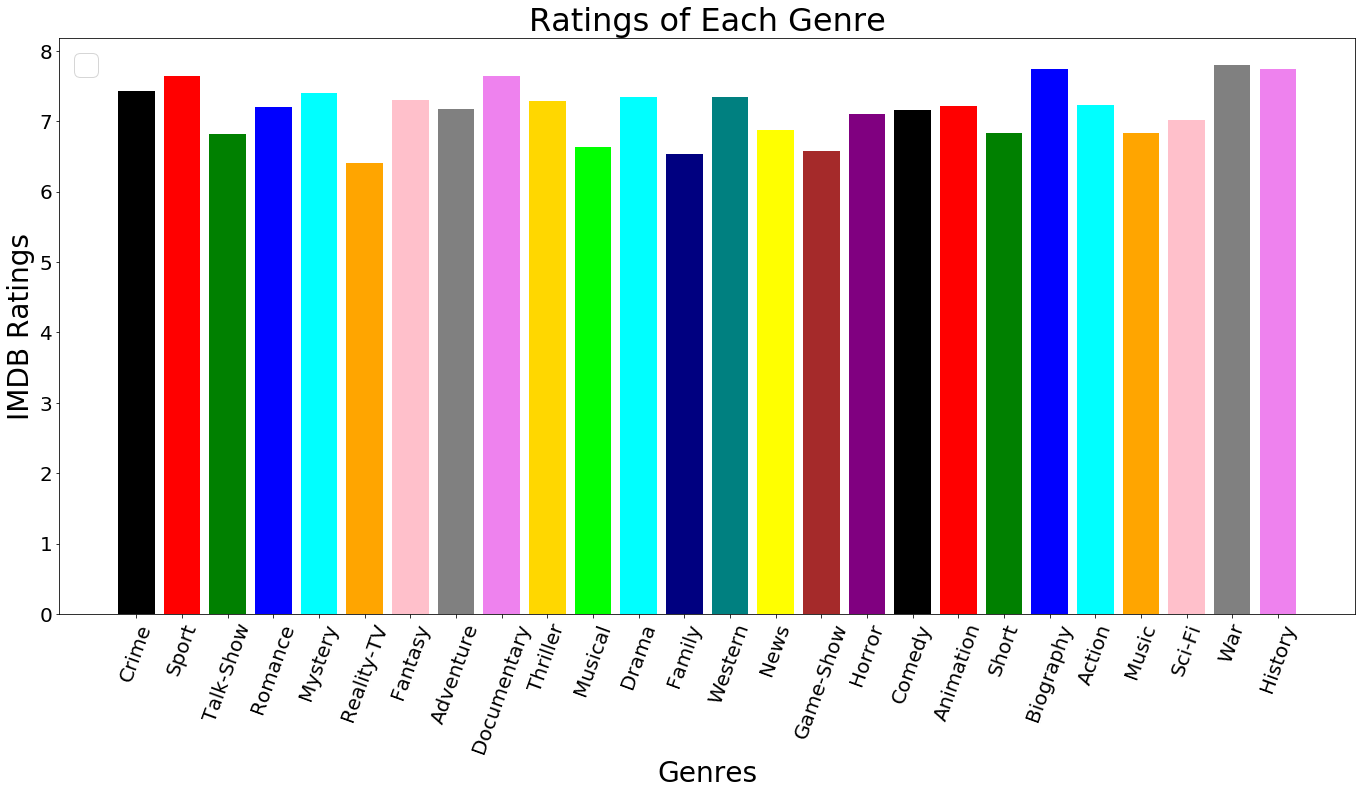

In [57]:
fig = plt.figure(figsize=(18,8))       #plotted our data using a bar graph
ax = fig.add_axes([0,0,1,1])

plt.xlabel('Genres', fontsize = 28) 
plt.ylabel('IMDB Ratings', fontsize = 28)
plt.title('Ratings of Each Genre', fontsize = 32)
plt.legend(r, loc=2, fontsize= 30)   #
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=70)
#plt.axes.tick_params(axis='both', labelsize=15)
ax.bar(r,genre_rating_avg,color=['black', 'red', 'green', 'blue', 'cyan', "orange", "pink", "grey", "violet", "gold", "lime", "aqua", "navy", "teal", "yellow", "brown", "purple"])
plt.show()